In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

import perturbseq as perturb

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [33]:
PROTEIN='TP53'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000
pref=SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.1000cells.analysis'

FIGS=DATA+'/2020-09-15_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2020-09-15_Figures/


In [6]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.h5ad',cache=False)
adata

Only considering the two last: ['.new_format', '.h5ad'].
Only considering the two last: ['.new_format', '.h5ad'].


AnnData object with n_obs × n_vars = 85778 × 1224 
    obs: 'batch', 'known', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain', 'G1.S', 'G2.M', 'M', 'M.G1', 'S', 'phase.multi', 'guide', 'guide.compact', 'G105C', 'G266E', 'G154V', 'Y220C', 'V216V', 'WT', 'M246V', 'E286K', 'C176Y', 'S366A', 'H193Y', 'L344L', 'E339K', 'P47P', 'V173M', 'V272L', 'R158H', 'C135F', 'A83V', 'L194R', 'T312S', 'S127F', 'R249S', 'R337L', 'R273H', 'V272M', 'R273L', 'Q5R', 'R249M', 

In [34]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.h5ad',cache=False)
adata

Only considering the two last: ['.analysis', '.h5ad'].
Only considering the two last: ['.analysis', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', '

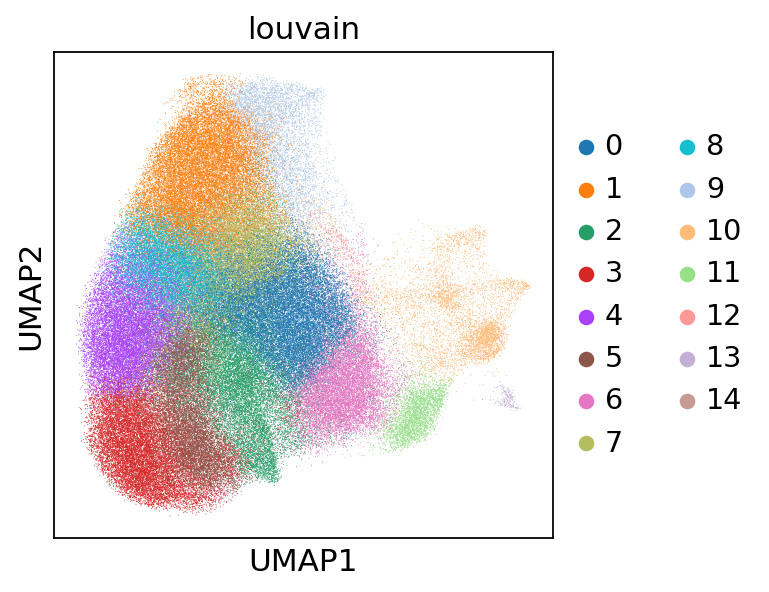

In [36]:
sc.pl.umap(adata,color=['louvain'])

In [37]:
perturb.tl.enriched_features(adata,f1='louvain',f2='mut.std',fdr=0.05,
                      copy=False,add_min_pval=True,pval_correction='fdr_bh',ps=1e-10)

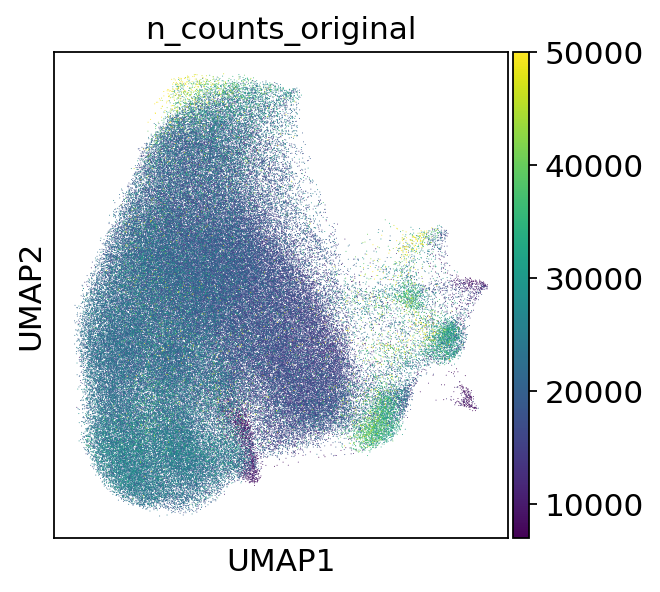

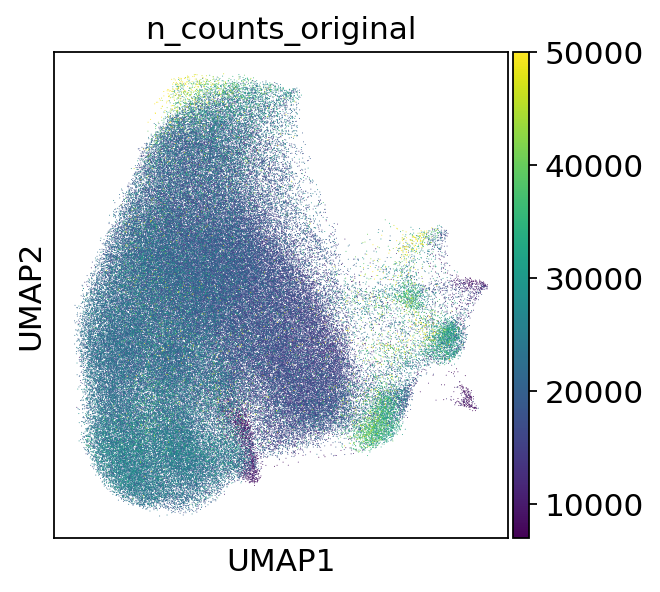

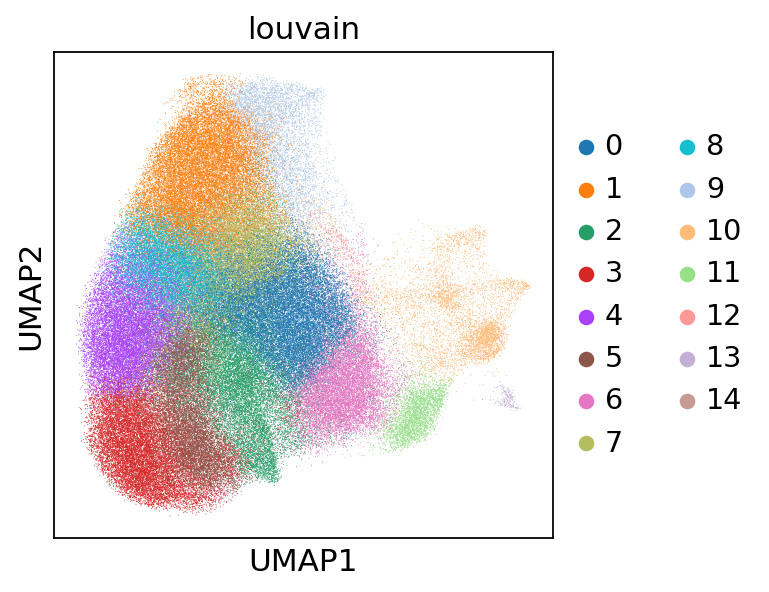

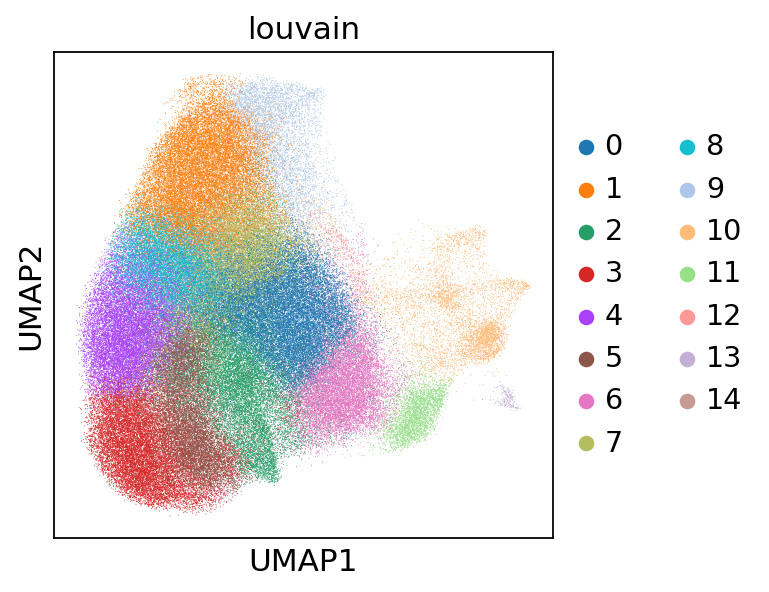

In [38]:
sc.set_figure_params(figsize=(4,4),dpi=80)
sc.pl.umap(adata,color=['n_counts_original'],vmax=50000,save='_'+PROTEIN+'_counts.pdf')
sc.pl.umap(adata,color=['n_counts_original'],vmax=50000,save='_'+PROTEIN+'_counts.png')
sc.pl.umap(adata,color=['louvain'],save='_'+PROTEIN+'_louvain.pdf')
sc.pl.umap(adata,color=['louvain'],save='_'+PROTEIN+'_louvain.png')

In [39]:
adata.obs['louvain'].value_counts()

0     21886
1     21045
2     17742
3     16875
4     16211
5     12922
6     12673
7     12663
8     12061
9      6511
10     5730
11     3544
12     2189
13      211
14       51
Name: louvain, dtype: int64

In [40]:
adata

AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', '

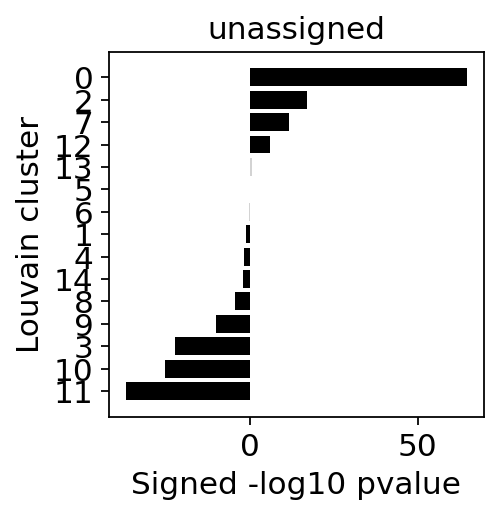

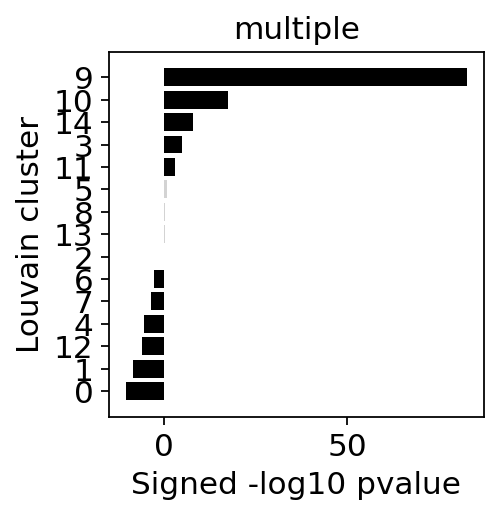

In [50]:
FDRlog=1
df=adata.uns['enrich_louvain_vs_mut.std.p_adj.negLog10.signed']

for entry in ['uninfected','multiple']:

    fig,plots=plt.subplots(1)
    fig.set_size_inches(3,3)
    df=df.sort_values(by=entry)
    df['color_'+entry]='lightgray'
    df.loc[np.abs(df[entry])>=FDRlog,'color_'+entry]='black'
    plots.barh(df.index,df[entry],color=df['color_'+entry])
    plots.set_xlabel('Signed -log10 pvalue')
    plots.set_ylabel('Louvain cluster')
    plots.grid(False)
    if entry=='uninfected':
        entry='unassigned'
    plots.set_title(entry)
    
    #plots.set_xlim(-10,10)
    plt.savefig(FIGS+'/'+PROTEIN+'.doublet_'+entry+'.pdf',bbox_inches = "tight") 
    plt.savefig(FIGS+'/'+PROTEIN+'.doublet_'+entry+'.png',bbox_inches = "tight")
    plt.show()

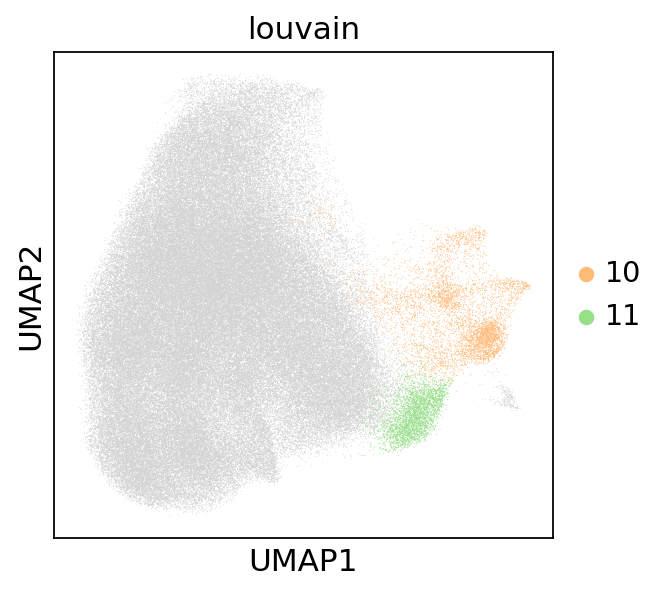

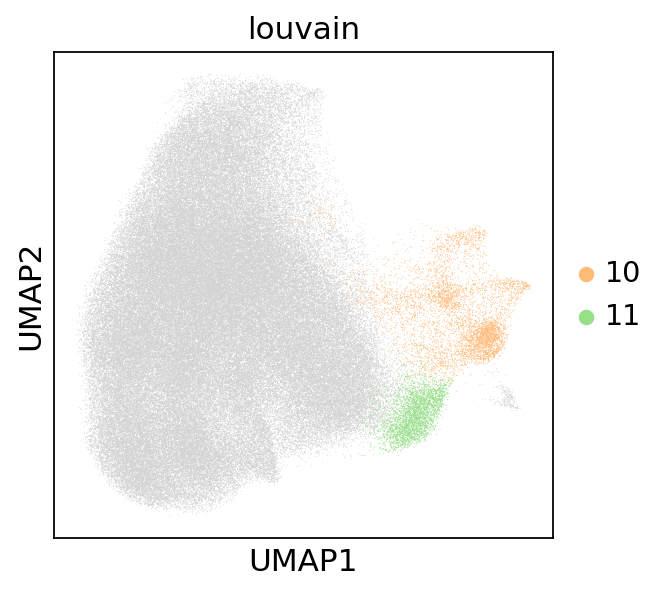

In [51]:
sc.pl.umap(adata,color=['louvain'],groups=['10','11'],save='_'+PROTEIN+'_doublet_subset.pdf')
sc.pl.umap(adata,color=['louvain'],groups=['10','11'],save='_'+PROTEIN+'_doublet_subset.png')

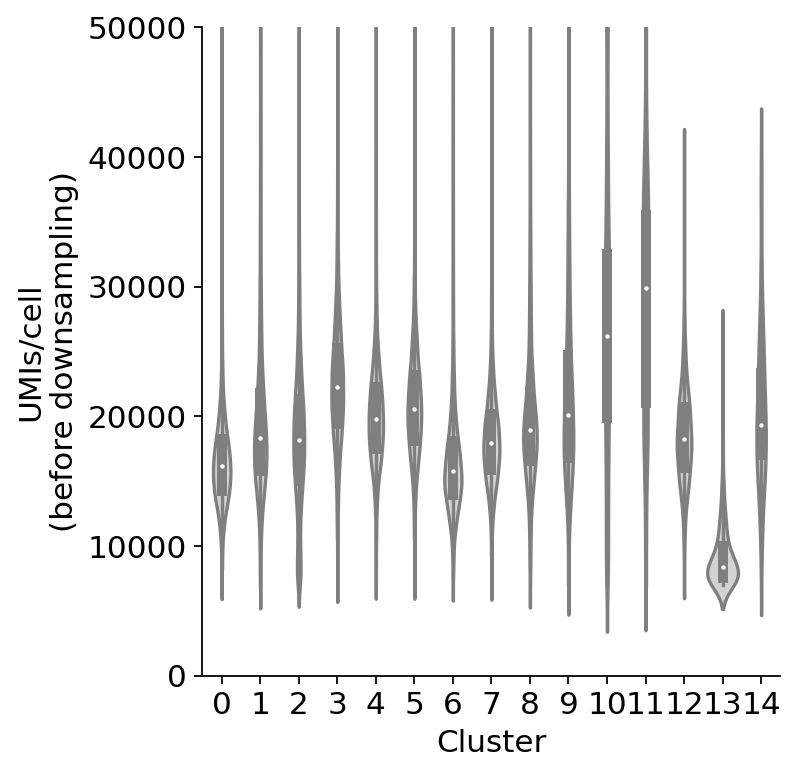

In [52]:
#the counts by cluster

sns.catplot(x='louvain',y='n_counts_original',data=adata.obs,kind='violin',
           height=5, # make the plot 5 units high
            aspect=1,
           color='lightgray')
plt.grid(False)
plt.xlabel('Cluster')
plt.ylabel('UMIs/cell\n(before downsampling)')
plt.ylim(0,50000)
plt.savefig(FIGS+'/'+PROTEIN+'.doublet_counts.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.doublet_counts.png',bbox_inches = "tight")

In [53]:
FIGS

'/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2020-09-15_Figures/'

In [54]:
counts=adata.obs['louvain'].value_counts()

In [55]:
(counts['10']+counts['11'])/adata.n_obs

0.05713616816787215